In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
data=pd.read_csv("Telco_Customer_Churn.csv")
display(data.head())
data.info()
display(data.describe())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
print("Missing values before handling:")
print(data.isnull().sum())


"""The **TotalCharges** column is currently
stored as an object (string) rather than a numeric value,
so it needs to be converted to a numeric type before performing any calculations or analysis."""


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("\nMissing values after converting TotalCharges:")
print(data.isnull().sum())

data.dropna(inplace=True)
print("\nMissing values after dropping rows:")
print(data.isnull().sum())

Missing values before handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalChar

In [4]:
#EDA

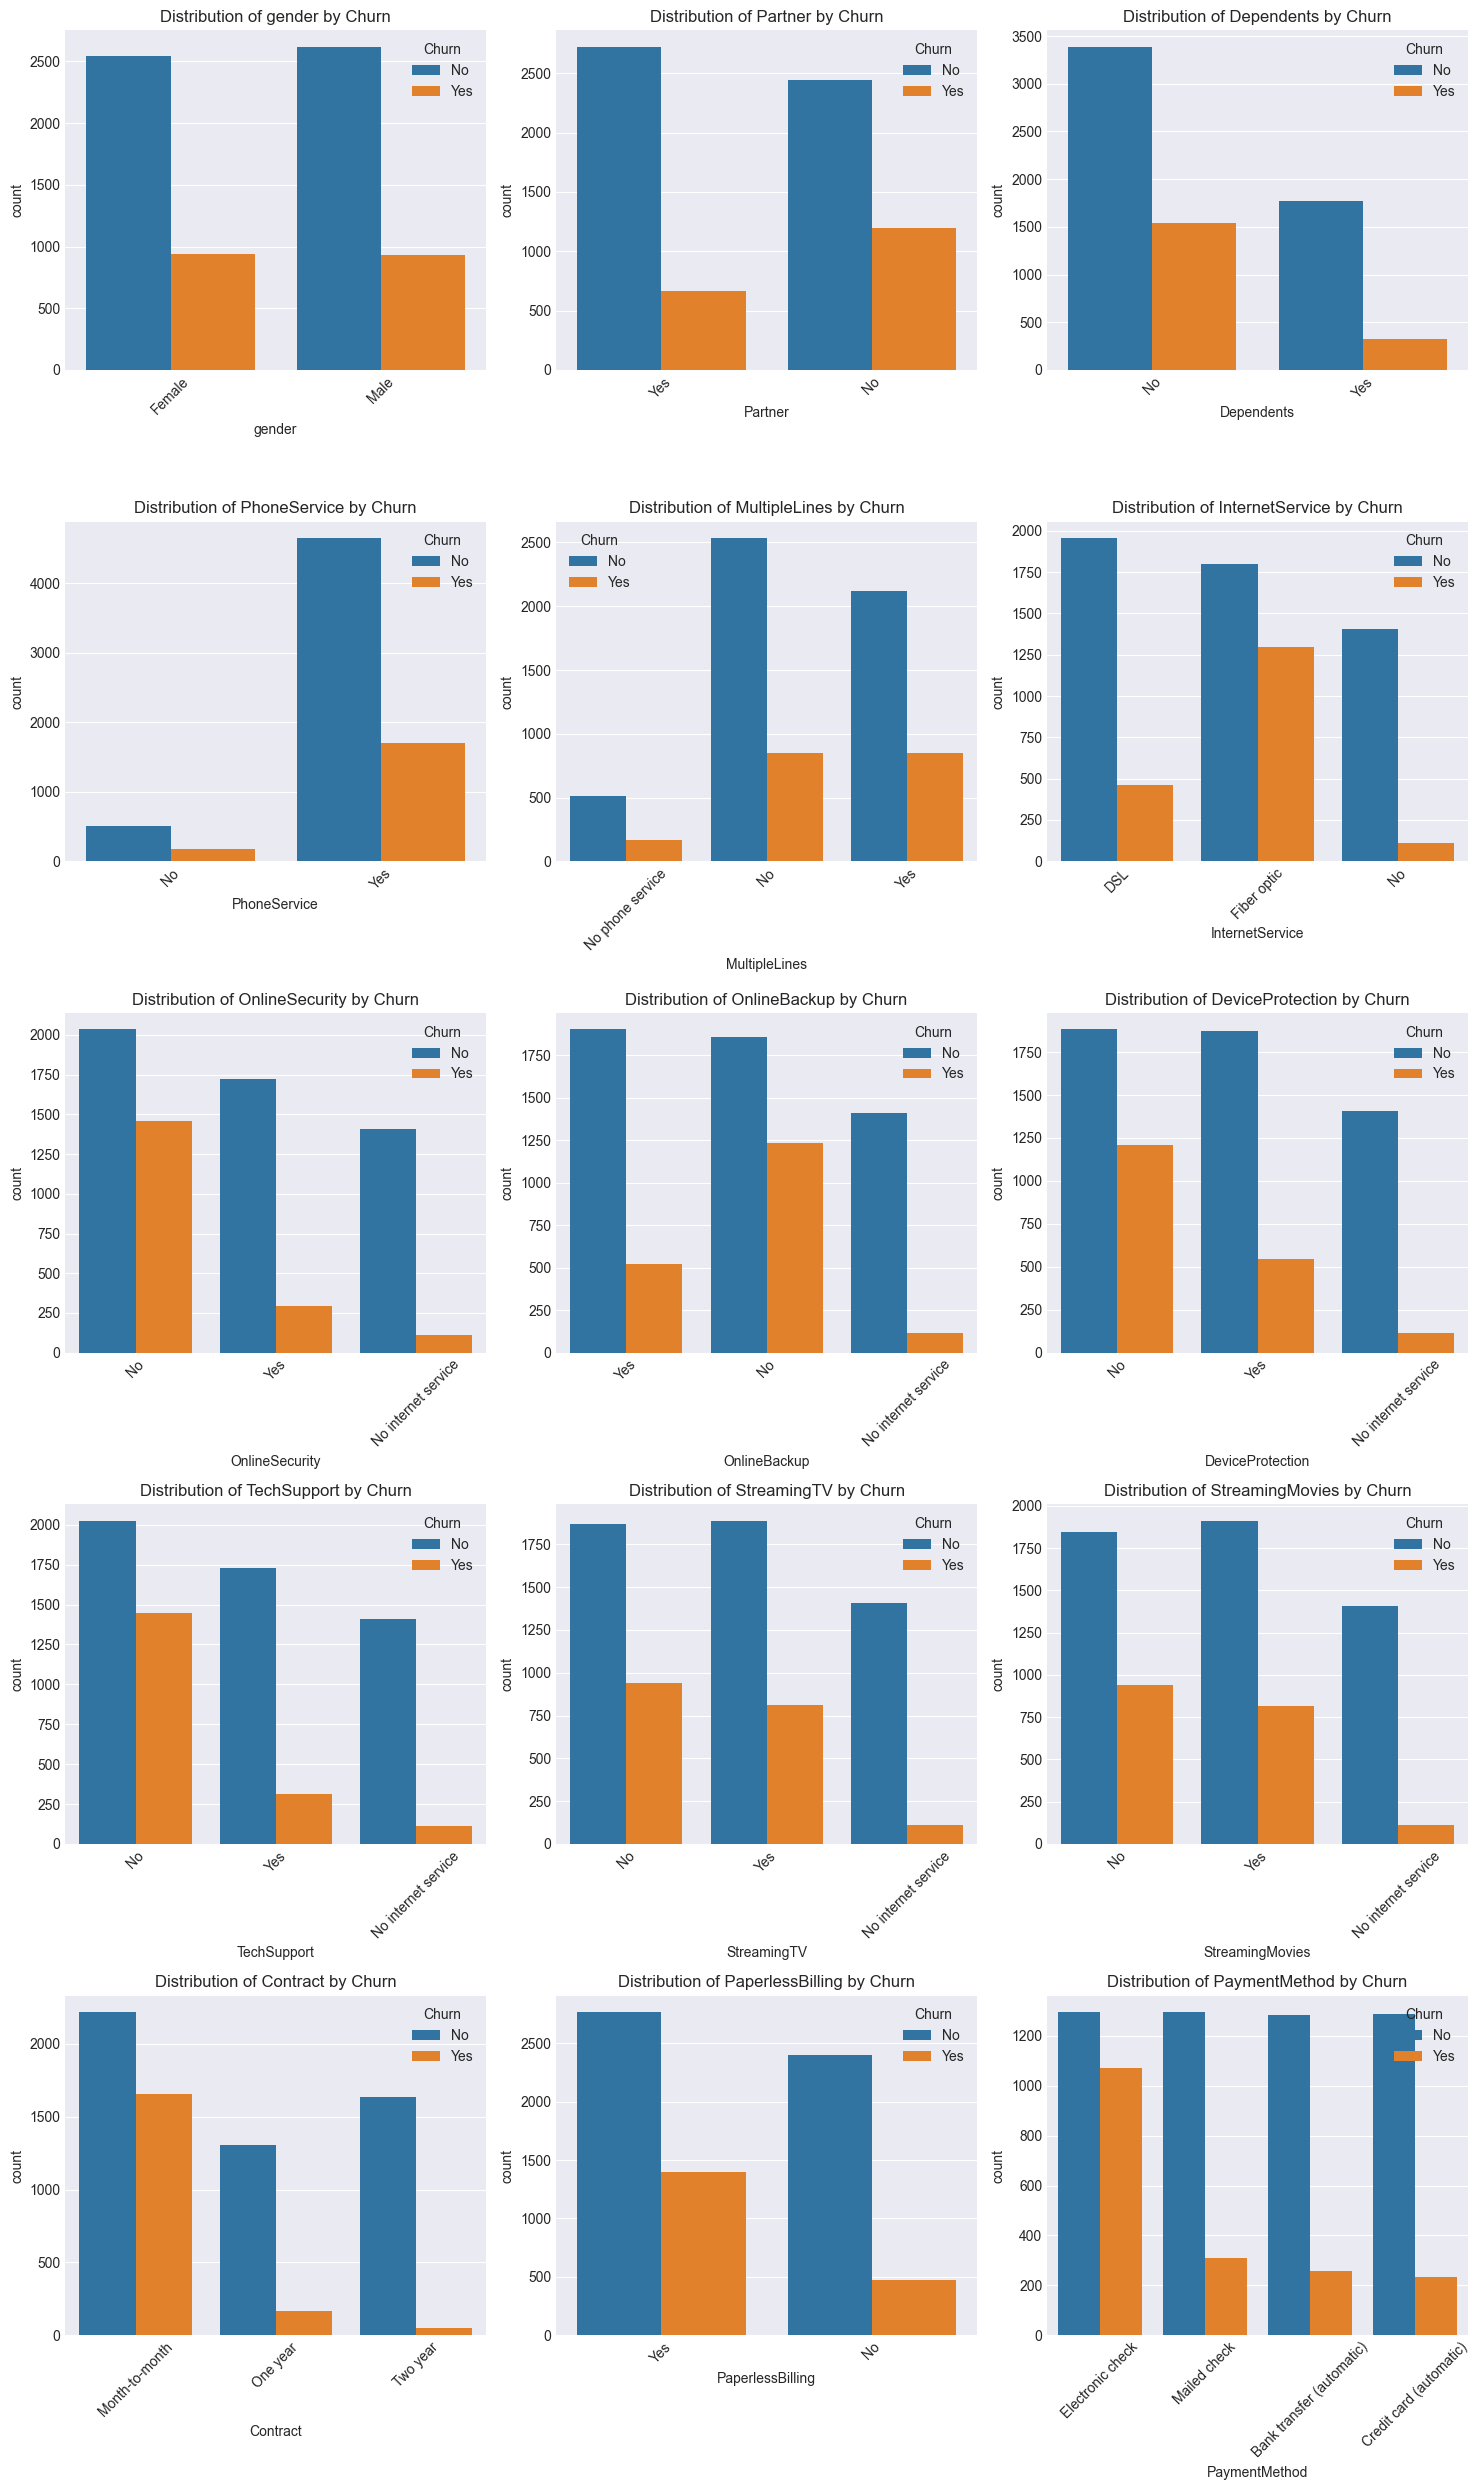

In [5]:
categorical_cols=data.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols=3
n_rows=(len(categorical_cols)+n_cols-1)//n_cols

fig,axes= plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes=axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data,x=col,hue="Churn",ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

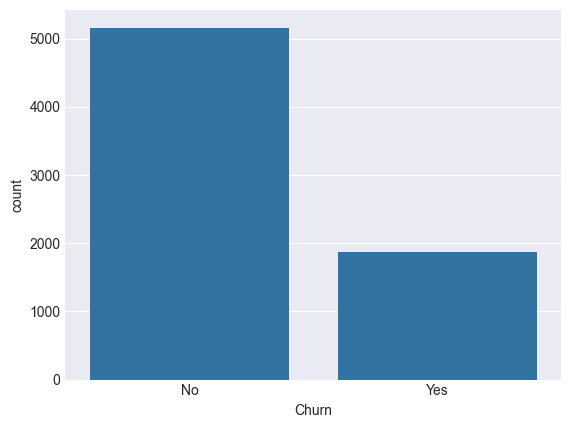

In [6]:
 sns.countplot(data=data,x="Churn")

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_numeric
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,0.015683,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.219874,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.102411,-0.199484
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,1.000000,0.150541
Churn_numeric,0.150541,-0.354049,0.192858,-0.199484,0.150541,1.000000


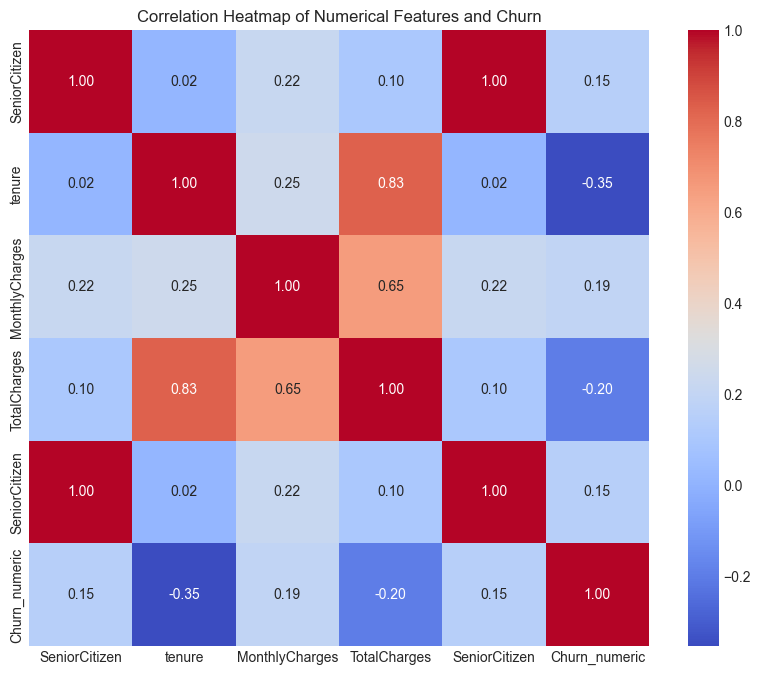

In [7]:
#heatmap

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']
print(numerical_cols)

# Convert 'Churn' column to numerical (0 for 'No', 1 for 'Yes')
data['Churn_numeric'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select only numerical columns and the new 'Churn_numeric' column
numerical_data = data[numerical_cols + ['Churn_numeric']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
display(correlation_matrix)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

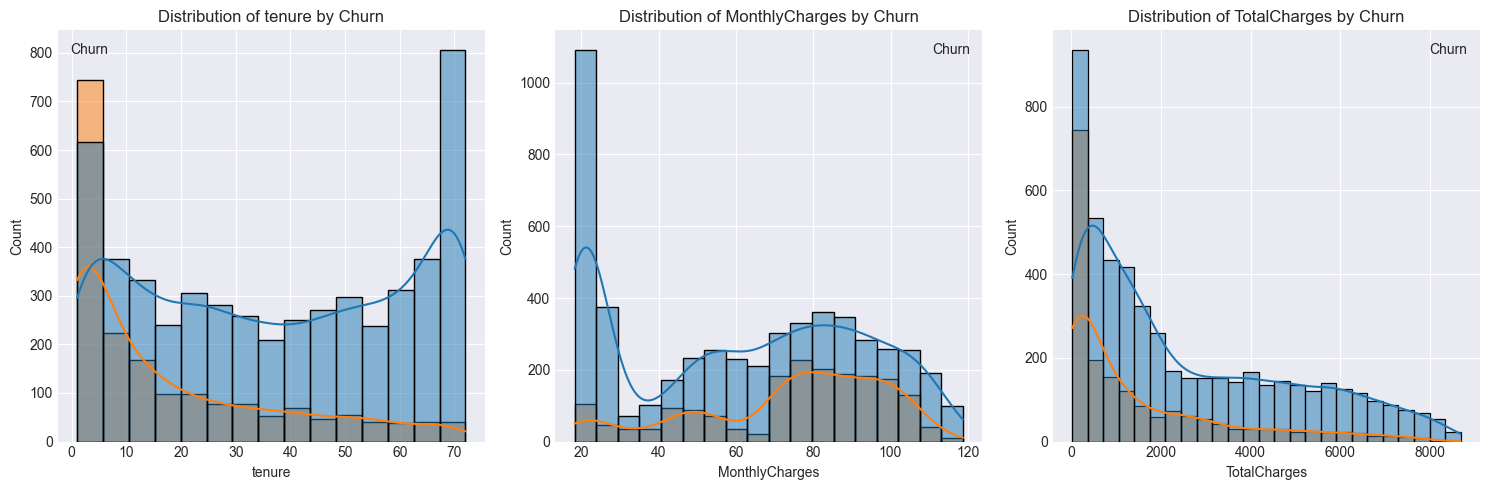

In [8]:
n_cols = 3
n_rows = (len(['tenure', 'MonthlyCharges', 'TotalCharges']) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    sns.histplot(data=data, x=col, hue='Churn', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].legend(title='Churn')


plt.tight_layout()
plt.show()

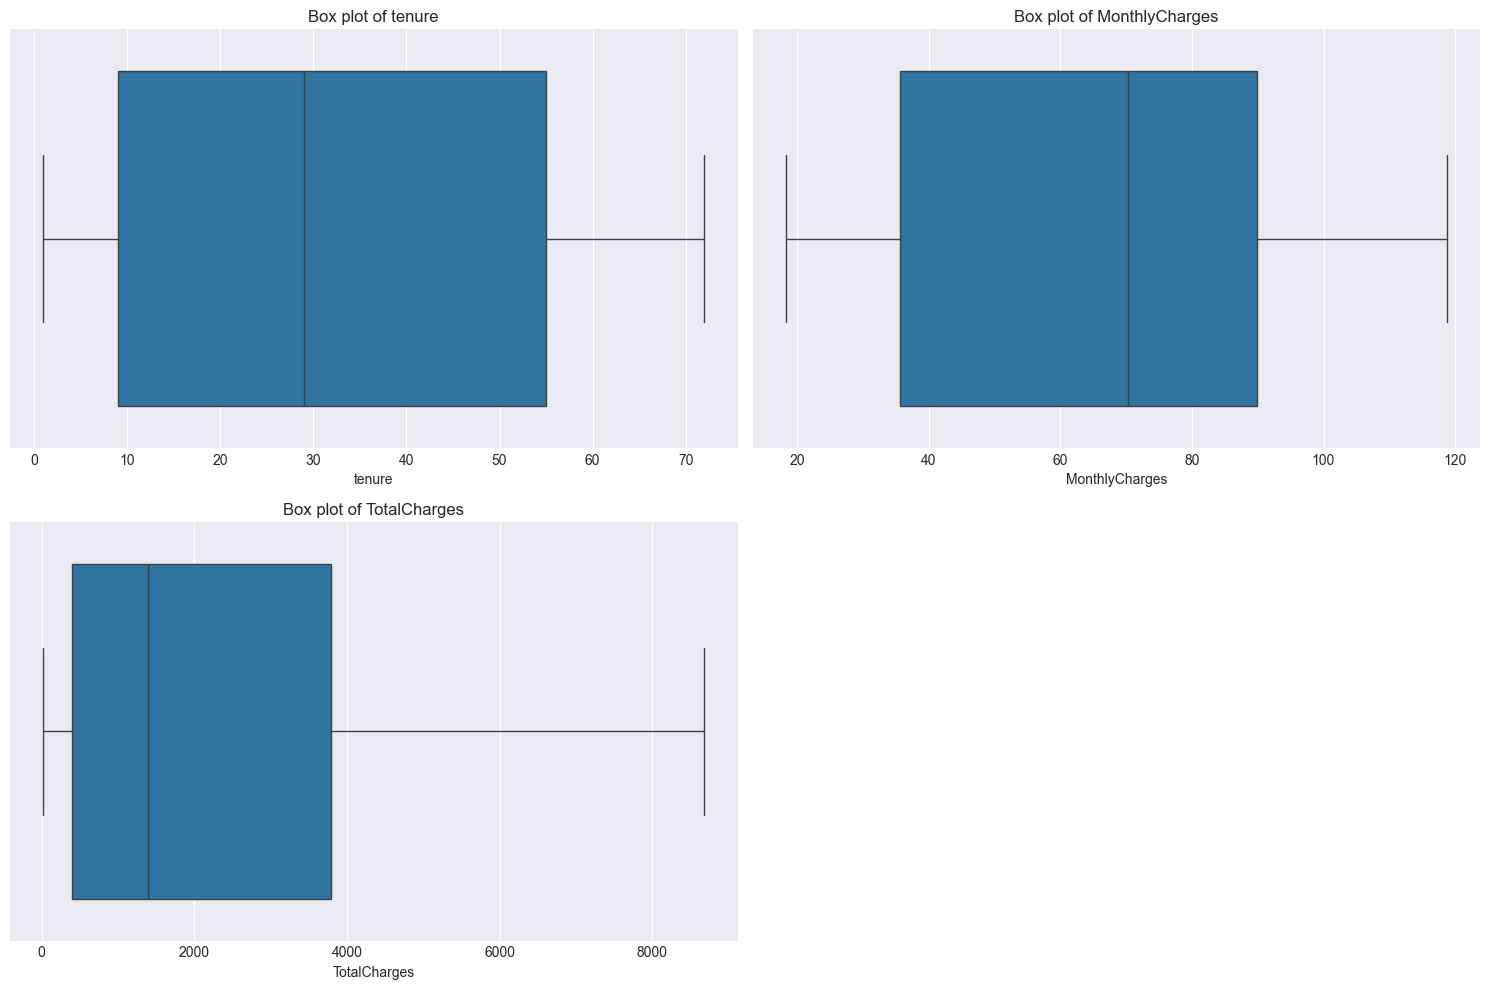

In [9]:
#PRE
#BOX

plt.figure(figsize=(15, 10))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [10]:
"""Based on these box plots, there don't seem to be any extreme outliers that would necessarily require removal"""

"Based on these box plots, there don't seem to be any extreme outliers that would necessarily require removal"

In [11]:
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     data[col] = label_encoder.fit_transform(data[col])
# data


label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [13]:
# Define features (X) and target (y)
# We drop 'customerID' as it's an identifier and 'Churn' and 'Churn_numeric' as they are target variables

import pickle


X = data.drop(['customerID', 'Churn', 'Churn_numeric'], axis=1)
y = data['Churn_numeric']

# Identify numerical columns for scaling (excluding the encoded categorical columns)
# We should only scale the truly numerical columns: 'tenure', 'MonthlyCharges', 'TotalCharges'
# 'SeniorCitizen' is binary and doesn't need scaling in this context.
numerical_cols_for_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']


# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])

X.to_csv("data/processed_X.csv", index=False)
y.to_csv("data/processed_y.csv", index=False)

with open("preprocessors.pkl", "wb") as f:
    pickle.dump({
        "label_encoders": label_encoders,
        "scaler": scaler,
        "categorical_cols": categorical_cols,
        "numerical_cols_for_scaling": numerical_cols_for_scaling
    }, f)


print("✅ Preprocessing done. Saved processed_X.csv and processed_y.csv.")



✅ Preprocessing done. Saved processed_X.csv and processed_y.csv.
